In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler,PowerTransformer
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('winequality-red.csv')


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

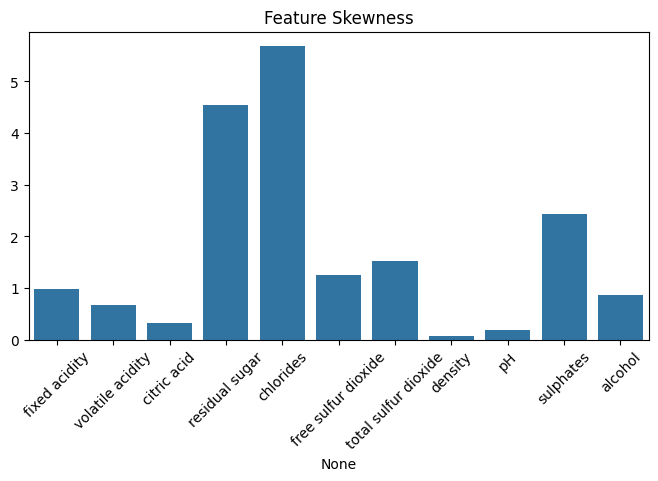

In [9]:
skew_vals = df.drop('quality', axis=1).skew()
plt.figure(figsize=(8,4))
sns.barplot(x=skew_vals.index, y=skew_vals.values)
plt.xticks(rotation=45)
plt.title('Feature Skewness')
plt.show()



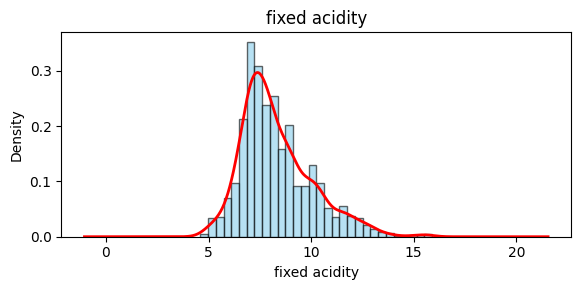

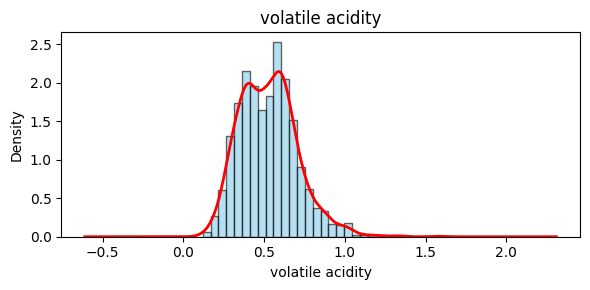

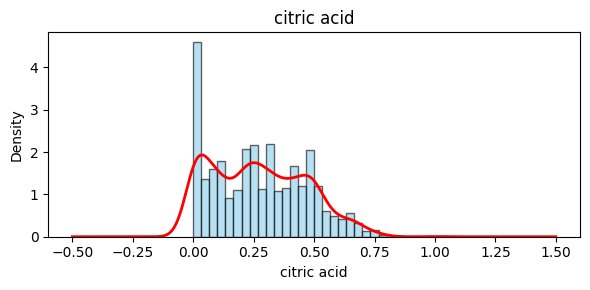

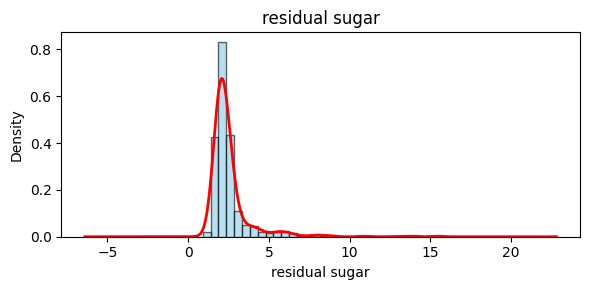

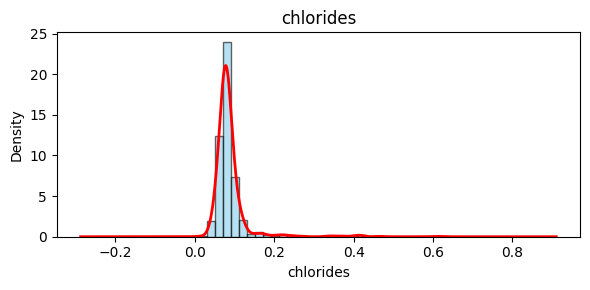

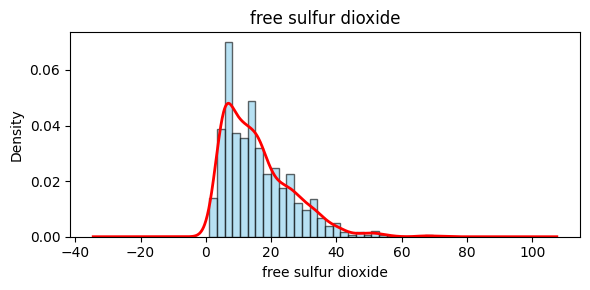

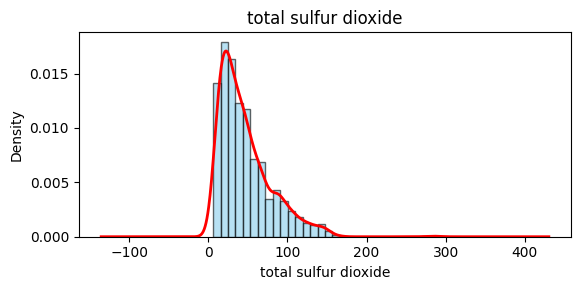

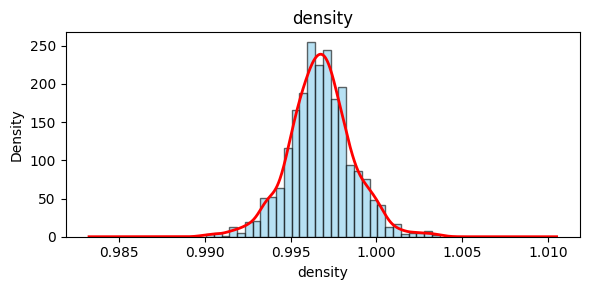

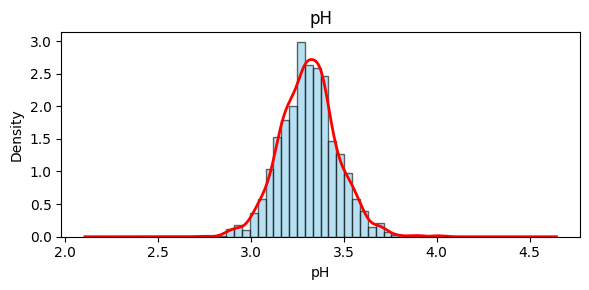

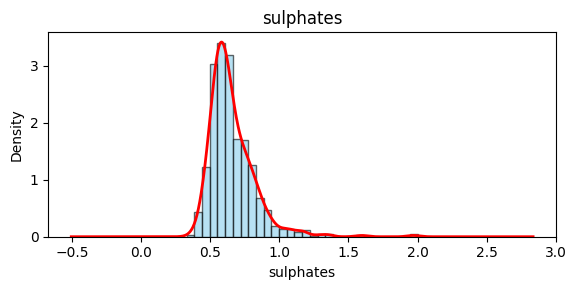

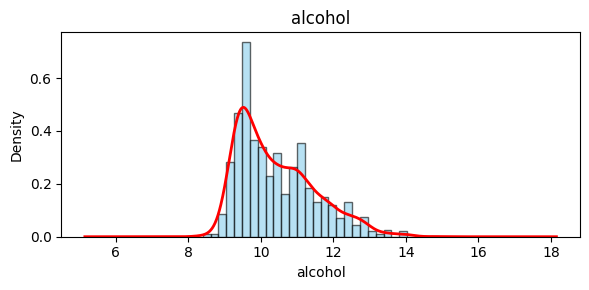

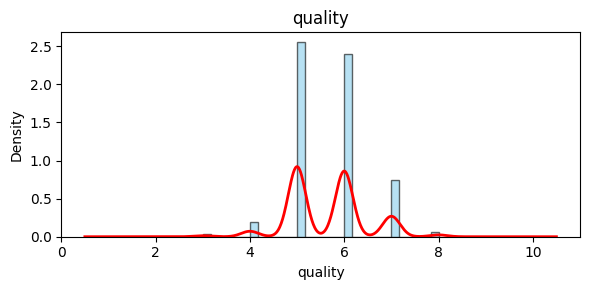

In [10]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(6, 3))
    df[col].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, color='skyblue', edgecolor='black')
    df[col].plot(kind='kde', ax=ax, color='red', linewidth=2)
    ax.set_title(f"{col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    plt.tight_layout()
    plt.show()

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
skewness = df[numeric_cols].apply(skew).sort_values(ascending=False)
print(skewness)


chlorides               5.675017
residual sugar          4.536395
sulphates               2.426393
total sulfur dioxide    1.514109
free sulfur dioxide     1.249394
fixed acidity           0.981829
alcohol                 0.860021
volatile acidity        0.670962
citric acid             0.318039
quality                 0.217597
pH                      0.193502
density                 0.071221
dtype: float64


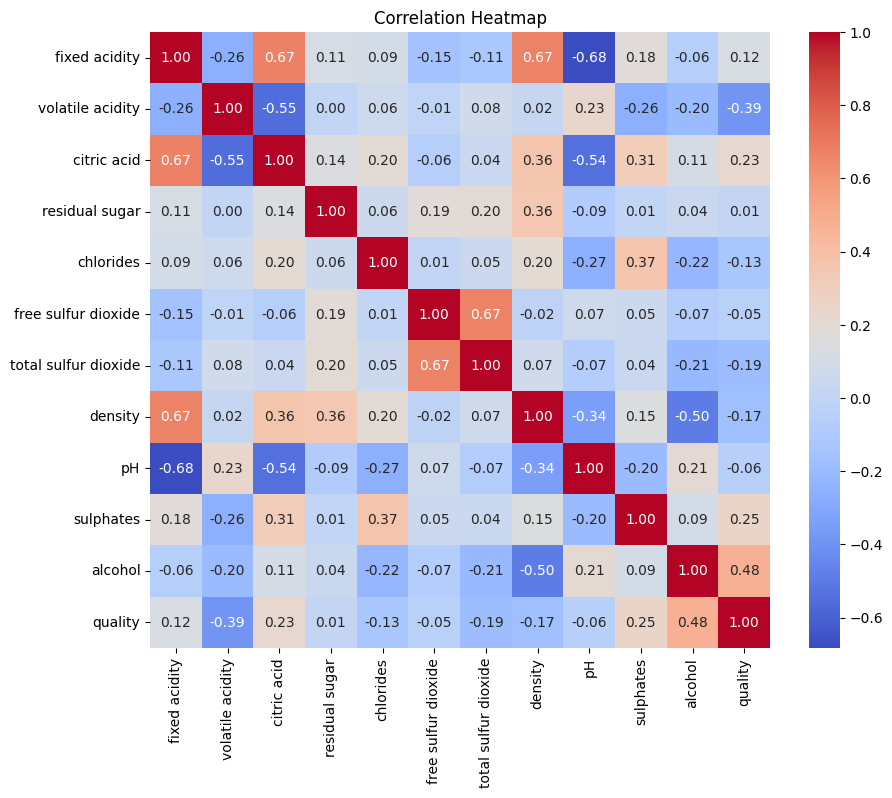

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


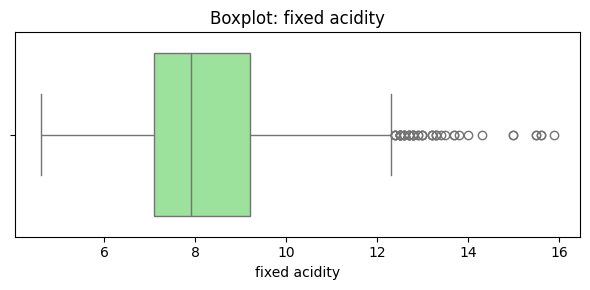

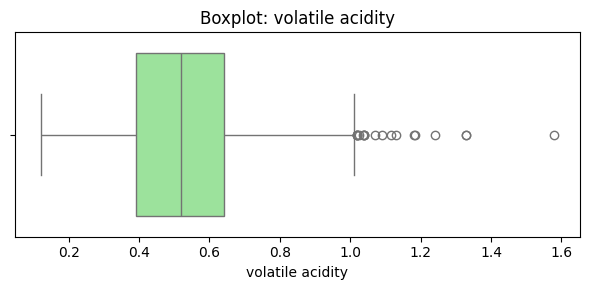

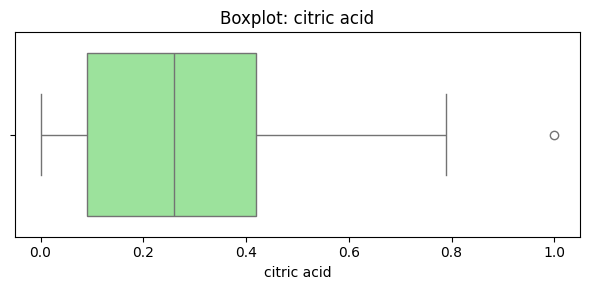

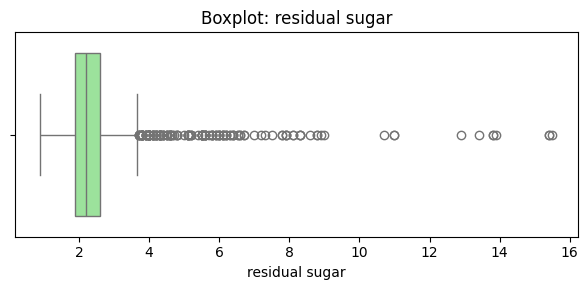

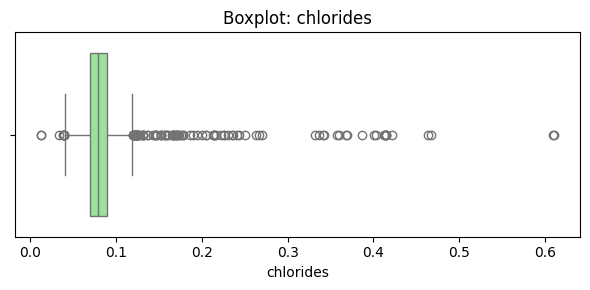

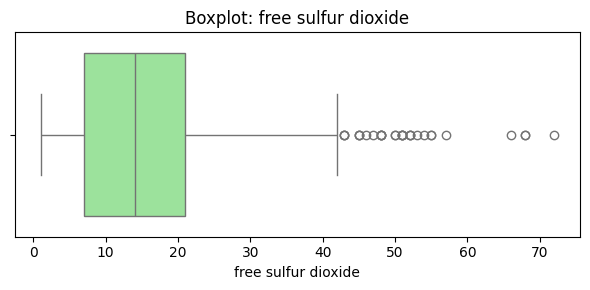

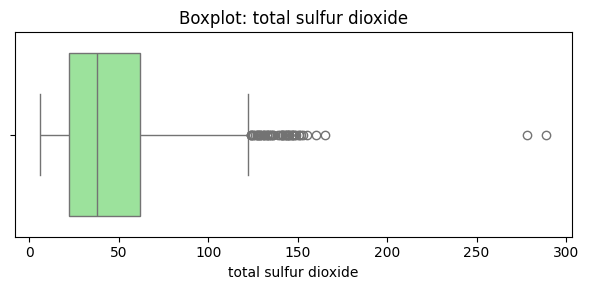

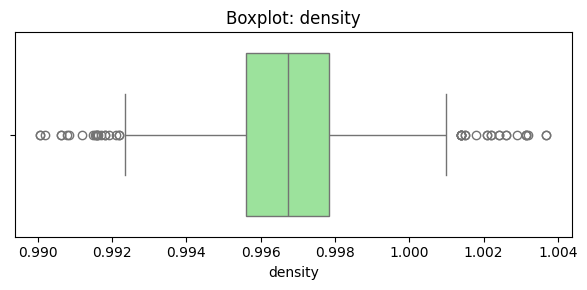

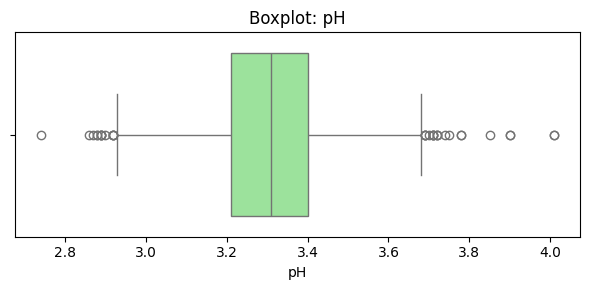

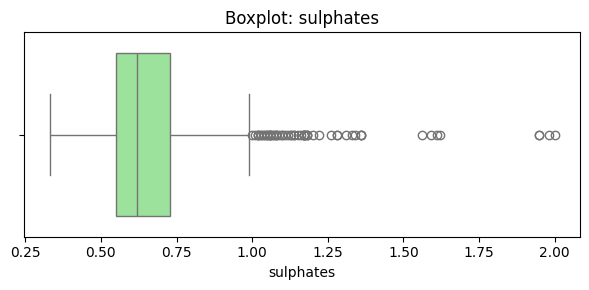

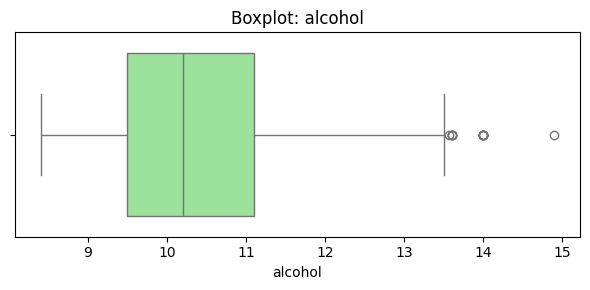

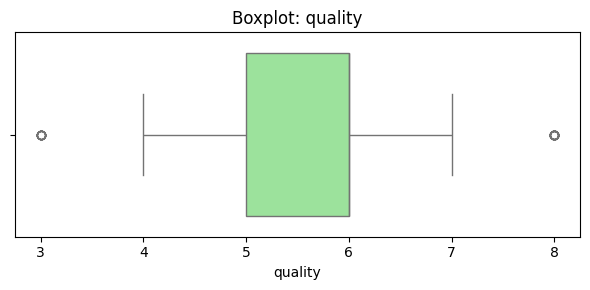

In [13]:
for col in df.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color="lightgreen")
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

In [14]:
def remove_outliers_iqr(data, cols, factor=1.5):
    df_copy = data.copy()
    mask = pd.Series(True, index=df_copy.index)
    for c in cols:
        Q1 = df_copy[c].quantile(0.25)
        Q3 = df_copy[c].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= df_copy[c].between(lower, upper)
    return df_copy[mask]

df_clean = remove_outliers_iqr(df, df.columns)
print(f"\nAfter IQR removal: {df_clean.shape[0]} rows (original {df.shape[0]})")


After IQR removal: 1179 rows (original 1599)


In [15]:
print("\nSkewness after reduction:\n", df_clean.skew())


Skewness after reduction:
 fixed acidity           0.737820
volatile acidity        0.269605
citric acid             0.311567
residual sugar          0.610312
chlorides               0.222378
free sulfur dioxide     0.831647
total sulfur dioxide    0.979866
density                 0.051941
pH                      0.060649
sulphates               0.623801
alcohol                 0.782520
quality                 0.256750
dtype: float64


In [16]:
skewed = df_clean.drop(columns=['quality']).skew()
skewed_features = skewed[skewed.abs() > 0.5].index.tolist()
print("\nApplying Yeo-Johnson to:", skewed_features)


Applying Yeo-Johnson to: ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [17]:
skewed = df_clean.drop(columns=['quality']).skew()

In [18]:
pt = PowerTransformer(method='yeo-johnson')
df[skewed_features] = pt.fit_transform(df[skewed_features])


In [19]:
print("Skewness after transformation:", df[skewed_features].apply(skew))


Skewness after transformation: fixed acidity           0.002526
residual sugar         -0.015700
free sulfur dioxide    -0.009939
total sulfur dioxide   -0.003749
sulphates               0.009976
alcohol                 0.112267
dtype: float64


In [20]:
df['quality_label'] = df['quality'].apply(lambda x: 'bad' if x < 5 else ('better' if x <= 7 else 'Best'))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,-0.442666,0.70,0.00,-0.597145,0.076,-0.268045,-0.124411,0.9978,3.51,-0.581650,-1.075025,5,better
1,-0.161308,0.88,0.00,0.556565,0.098,0.993852,0.854954,0.9968,3.20,0.395140,-0.500860,5,better
2,-0.161308,0.76,0.04,0.152372,0.092,0.193450,0.540394,0.9970,3.26,0.183772,-0.500860,5,better
3,1.522582,0.28,0.56,-0.597145,0.075,0.385115,0.693699,0.9980,3.16,-0.392318,-0.500860,6,better
4,-0.442666,0.70,0.00,-0.597145,0.076,-0.268045,-0.124411,0.9978,3.51,-0.581650,-1.075025,5,better


In [21]:
df['quality_label'].value_counts()


quality_label
better    1518
bad         63
Best        18
Name: count, dtype: int64

In [22]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df['quality_label']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = DecisionTreeClassifier(max_depth=None,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [26]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

Precision: 0.91


In [27]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.90


In [28]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

F1-score: 0.90


In [29]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   5]
 [  0   1  10]
 [  5  11 288]]


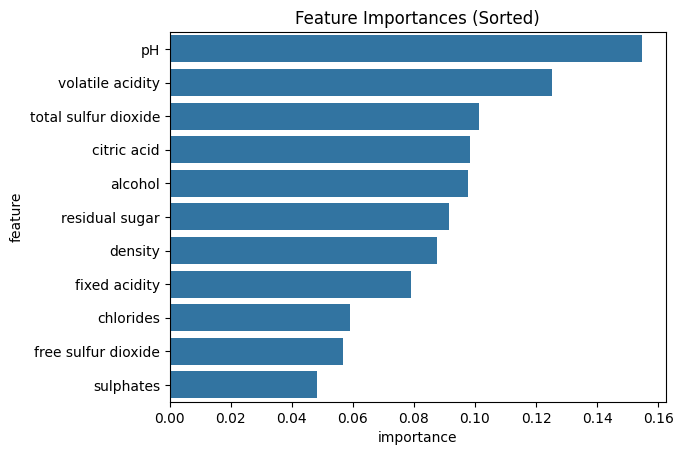

In [30]:
importances = model.feature_importances_
feat_names = X.columns
feat_importances = pd.DataFrame({'feature': feat_names, 'importance': importances})
feat_importances = feat_importances.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feat_importances)
plt.title("Feature Importances (Sorted)")
plt.show()


In [31]:
import joblib as jl
jl.dump(model,"wine.pkl")

['wine.pkl']